# Importing Libraries

In [23]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [24]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

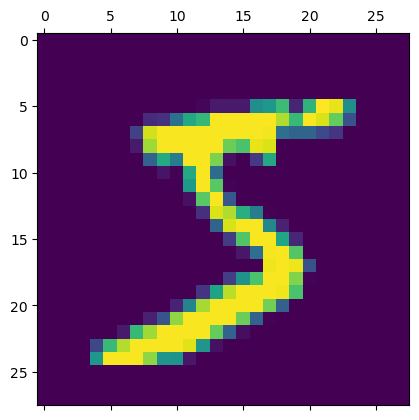

In [25]:
#to see how first image looks
plt.matshow(x_train[0])

In [26]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [29]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [30]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6588 - accuracy: 0.8336 - val_loss: 0.3586 - val_accuracy: 0.9037
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3383 - accuracy: 0.9063 - val_loss: 0.2955 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2893 - accuracy: 0.9191 - val_loss: 0.2659 - val_accuracy: 0.9261
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9277 - val_loss: 0.2386 - val_accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2354 - accuracy: 0.9342 - val_loss: 0.2195 - val_accuracy: 0.9382
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2159 - accuracy: 0.9399 - val_loss: 0.2031 - val_accuracy: 0.9420
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1995 - accuracy: 0.9443 - val_loss: 0.1893 - val_accuracy:

# Evaluate the Model

In [31]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1591 - accuracy: 0.9554
Loss = 0.159
Accuracy = 0.955


# Making Prediction on New Data

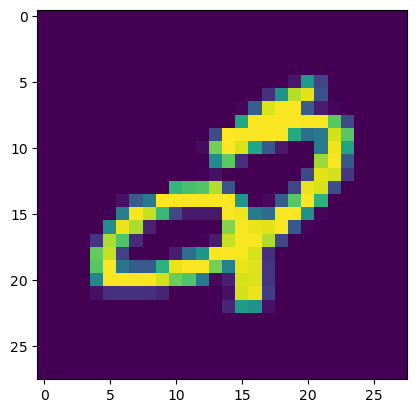

In [32]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [33]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 964    0    1    1    0    5    6    2    1    0]
 [   0 1117    3    2    1    1    3    2    6    0]
 [   7    3  983    4    7    1    9    8   10    0]
 [   0    1    4  964    0   16    1   11   10    3]
 [   1    1    5    0  931    0   13    2    3   26]
 [   8    1    0   14    2  846    9    1    7    4]
 [   7    3    2    0    6   11  927    0    2    0]
 [   2    7   23    3    3    1    0  974    1   14]
 [   4    3    3   15    6   12    8    9  910    4]
 [   9    8    1   11   19    8    1   10    4  938]], shape=(10, 10), dtype=int32)


Feedforward Neural Network (MLP): A type of deep learning model where data flows in one direction from input to output. In this assignment, the MLP model is used for digit classification on the MNIST dataset.

Keras and TensorFlow: Keras, as an API within TensorFlow, allows easy model-building. TensorFlow is the underlying platform enabling machine learning with its powerful tools for defining and training neural networks.

MNIST Dataset: A widely-used dataset containing 28x28 grayscale images of handwritten digits, labeled from 0 to 9. It's often used for testing classification models due to its simplicity and high-quality data.

Network Architecture: The model consists of an input layer (Flatten layer) that converts image matrices into vectors, followed by a hidden Dense layer with ReLU activation for learning features, and an output Dense layer with softmax activation for classification.

Training and Evaluation: Using Stochastic Gradient Descent (SGD) for optimization, the model is trained and compiled with the sparse_categorical_crossentropy loss function, appropriate for multi-class classification. The model’s performance is measured in terms of accuracy, and it is visualized through graphs of loss and accuracy over epochs.

Model Generalization: Achieving over 90% accuracy is a key objective, with focus on methods to improve generalization, meaning the model should perform well on unseen data, not just the training set.

Evaluation Metrics: Final performance is assessed through accuracy and visual tools like confusion matrices, highlighting the classification accuracy per digit.

In this assignment, a Feedforward Neural Network (MLP) will be built and trained to classify handwritten digits from the MNIST dataset using Keras with TensorFlow. The steps include loading the MNIST dataset, defining the neural network architecture with one hidden layer, training the model using Stochastic Gradient Descent (SGD), and evaluating its performance. Key objectives are to understand model training and evaluation, achieve over 90% accuracy on the dataset, and research methods to improve generalization. TensorFlow's Keras API simplifies constructing the model, where a Flatten layer converts each image to a vector and Dense layers with ReLU and softmax activations perform the classification.

The model is compiled with the sparse_categorical_crossentropy loss function, ideal for multi-class problems, and is trained over 10 epochs, showing progressively improved accuracy and reduced loss, indicating effective learning. Results are visualized through graphs of training loss and accuracy, and the evaluate() method is used to check the model’s accuracy on test data. With a confusion matrix, the classification performance across each digit can be observed. Overall, this exercise showcases building a neural network model from scratch, training it, and achieving desired accuracy in image classification.